In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
from scipy import stats
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

from plotly.subplots import make_subplots
py.offline.init_notebook_mode(connected=True)
stopwords = set(stopwords.words('english'))
from wordcloud import WordCloud



In [57]:
def str_to_dt(df, column):
    df[column] = df[column].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
    df['date'] = df[column].apply(lambda x: x.date())
    df['date_hour'] = df[column].apply(lambda x: f"{x.date()} {x.hour}:00:00")
    df['date_hour'] = df['date_hour'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
    return df

wsb_df = str_to_dt(wsb_df, 'timestamp')

Unnamed: 0                                              title  \
0                0                          Whats going on with PLTR?   
1                1  Need explanations on Level 2 data for GME, why...   
2                2       XRT is being used as a laundry short machine   
3                3                                          Airlines?   
4                4                                         Buy TRXC 🚀   
...            ...                                                ...   
572902      579469  Buying calls is NOT the way, do you need to he...   
572903      579470  Options are NOT the way, do you need to hear t...   
572904      579471  Thank you degenerates for a huge 2020, can't w...   
572905      579472                 You might need to hear this! F2020   
572906      579473        This is what I've been waiting for all year   

                   author  scores  comments           timestamp        date  \
0                Zaccko98       1         2 2021-02-16 04:53:12  2021-02-16   
1               toutoucnc       1         2 2021-02-16 04:53:09  2021-02-16   
2                  thabat       1         2 2021-02-16 04:52:46  2021-02-16   
3             AsianTwink_       1         2 2021-02-16 04:52:45  2021-02-16   
4          Oneverystreet8       1         2 2021-02-16 04:52:44  2021-02-16   
...                   ...     ...       ...                 ...         ...   
572902  cheaptissueburlap       1         5 2020-12-31 16:24:38  2020-12-31   
572903  cheaptissueburlap       1         0 2020-12-31 16:23:28  2020-12-31   
572904            kds0321       1         0 2020-12-31 16:22:31  2020-12-31   
572905  cheaptissueburlap       1         0 2020-12-31 16:21:52  2020-12-31   
572906              1A9D6       1         6 2020-12-31 16:21:36  2020-12-31   

                 date_hour  
0      2021-02-16 04:00:00  
1      2021-02-16 04:00:00  
2      2021-02-16 04:00:00  
3      2021-02-16 04:00:00  
4      2021-02-16 04:00:00  
...                    ...  
572902 2020-12-31 16:00:00  
572903 2020-12-31 16:00:00  
572904 2020-12-31 16:00:00  
572905 2020-12-31 16:00:00  
572906 2020-12-31 16:00:00  

[572907 rows x 8 columns]

In [61]:
wsb_df = pd.read_csv('../data/Clean_WSB.csv')




### Convert timestamp to datetime ### 
def str_to_dt(df, column):
    df[column] = df[column].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
    df['date'] = df[column].apply(lambda x: x.date())
    df['date_hour'] = df[column].apply(lambda x: f"{x.date()} {x.hour}:00:00")
    df['date_hour'] = df['date_hour'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
    return df

wsb_df = str_to_dt(wsb_df, 'timestamp')




### apply RE to remove emojis, punc., stopwords; explode title for easy groupby counting ###
wsb_df['title'] = wsb_df['title'].astype(str)
wsb_df['title'] = wsb_df['title'].map(lambda x: re.sub(r"[^A-Za-z ]", '', x))
wsb_df['title'] = wsb_df['title'].map(lambda x: x.lower().split(' '))
wsb_df_explode = wsb_df.explode('title')
wsb_df_explode =  wsb_df_explode[ ~wsb_df_explode['title'].isin(stopwords)]


### narrow specific securities ###
wsb_full = wsb_df_explode.replace({'gamestop': 'gme', 'nokia': 'nok', 'dogecoin': 'doge', 
                                         'bitcoin': 'btc', 'amazon': 'amzn', 'microsft': 'msft',
                                         'tesla': 'tsla', 'indexsp': 'sp500', '500': 'sp500', 'sp': 'sp500'})

In [27]:
### find and sort count of used words ###
wsb_df_groupby = wsb_full.groupby(['title']).count().reset_index()
wallstreetbets = wsb_df_groupby.sort_values('author', ascending = False)
wallstreetbets = wallstreetbets.drop(0)
wallstreetbets = wallstreetbets.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp', 'date'], axis =1)
wallstreetbets = wallstreetbets.rename(columns = {'title':'title','date_hour': 'count'})
text = wallstreetbets.title.head(30)


words = []
for word in text:
    words.append(word)
    
words = ' '.join(words)

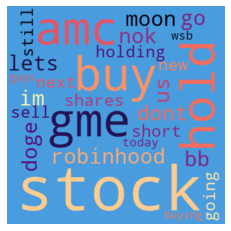

In [28]:
# Create and generate a word cloud image:
wordcloud = WordCloud(width=480, height=480, max_words = 30, background_color="rgb(73, 157, 222)",colormap="magma").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
### Big movers: GME, NOK, AMC, Dogecoin ### 
### Other popular stocks: bitcoin, AMZN, MSFT, TSLA ###
### Also SMP 500 and stock indexes. ###

stonks = wallstreetbets[(wallstreetbets['title'] == 'gme') | (wallstreetbets['title'] == 'nok') | 
                       (wallstreetbets['title'] == 'amc') | (wallstreetbets['title'] == 'doge') | 
                       (wallstreetbets['title'] == 'btc') | (wallstreetbets['title'] == 'amzn') |
                       (wallstreetbets['title'] == 'msft')| (wallstreetbets['title'] == 'tsla') |
                       (wallstreetbets['title'] == 'sp500')].sort_values('count', ascending = True)

In [30]:
fig = px.bar(stonks, x='count', y='title', title='Mentions in WSB', 
             orientation = 'h', labels = {
                 'title': 'Securities',
                 'count': 'Number of Mentions'})

fig.update_traces(marker_color='rgb(73, 157, 222)',
                  marker_line_width=1.5)

fig.layout.plot_bgcolor='rgb(84, 85, 87)'

fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()

In [31]:
all_date = wsb_full.groupby(['title','date']).count().reset_index()
all_date = all_date[(all_date['title'] == 'gme') | (all_date['title'] == 'nok') | 
                       (all_date['title'] == 'amc')]
all_date = all_date.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
all_date = all_date.rename(columns = {'title':'title','date' : 'date', 'date_hour': 'count'})


fig = px.histogram(all_date, x='date', y='count', color = 'title', title='Daily Mentions for GME, NOK, AMC',
                   barmode='overlay', nbins=len(all_date['date']), opacity=0.4)

fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
# fig.update_traces(marker_color='rgb(73, 157, 222)',
#                   marker_line_width=1.5)
fig.show()

In [32]:
### Organize by gme and date to graph ###
gme_date = wsb_full.groupby(['title','date']).count().reset_index()
gme_date = gme_date[gme_date['title'] == 'gme']
gme_date = gme_date.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
gme_date = gme_date.rename(columns = {'title':'title','date' : 'date', 'date_hour': 'count'})

In [33]:
fig = px.histogram(gme_date, x='date', y='count', title='Daily GME Mentions', nbins= len(gme_date['date']))

fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.update_traces(marker_color='rgb(73, 157, 222)',
                  marker_line_width=1.5)
fig.show()

In [34]:
### Group by gme and hour for graphing, reduce to Jan25-29th for easier graphing ###
jan_25 = datetime.strptime('2021-01-25 00:00:00', "%Y-%m-%d %H:%M:%S")
jan_29 = datetime.strptime('2021-01-29 23:00:00', "%Y-%m-%d %H:%M:%S")
gme_hour = wsb_full.groupby(['title','date_hour']).count().reset_index()
gme_hour = gme_hour[(gme_hour['title'] == 'gme') & (gme_hour['date_hour'] > jan_25)&
                    (gme_hour['date_hour'] <= jan_29)]
gme_hour = gme_hour.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
gme_hour = gme_hour.rename(columns = {'title':'title','date_hour' : 'date', 'date': 'count'})

In [35]:
fig = px.line(gme_hour, x='date', y='count', title='Hourly GME Mentions - Jan 25th to Jan 29th',
             labels = {
                 'date':'Hours',
                 'count':'Mentions'
             })
fig.update_traces(line_color='rgb(73, 157, 222)', line = {'width':3})
fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()

In [36]:
### Use alpha vantage to gather daily and hourly stock data ###

from alpha_vantage.timeseries import TimeSeries

API_key = 'OZHBQ2Q48QC0NFRZ'

### daily chart, include percent change ###
ts = TimeSeries(key = API_key,output_format='pandas')
data = ts.get_daily_adjusted('GME')
gme = data[0].reset_index()
gme_daily = gme[(gme['date'] >= '2020-12-31') & (gme['date'] <= '2021-02-16')]
gme_daily.to_csv('gme_daily_prices')
gme_daily=gme_daily.sort_values('date', ascending=True)
gme_daily['percent change'] = gme_daily['4. close'].pct_change()


### hourly chart, include percent change ###
data = ts.get_intraday('GME', interval = '60min', outputsize='full')
gme = data[0].reset_index()
gme_hourly_full = gme[(gme['date'] >= '2020-12-31') & (gme['date'] <= '2021-02-16')]
gme_hourly_full = gme_hourly_full.sort_values('date', ascending=True)
gme_hourly = gme[(gme['date'] >= '2021-01-25') & (gme['date'] <= '2021-01-29')]
gme_hourly = gme_hourly.sort_values('date', ascending=True)
gme_hourly['percent change'] = gme_hourly['4. close'].pct_change()

In [37]:
### Hourly candlestick graph ### 
fig = go.Figure(data=[go.Candlestick(x=gme_hourly_full['date'],
                open=gme_hourly_full['1. open'],
                high=gme_hourly_full['2. high'],
                low=gme_hourly_full['3. low'],
                close=gme_hourly_full['4. close'])])
fig.update_layout(
    title_text="Hourly Candlestick")

fig.update_yaxes(title_text="Price")
fig.update_xaxes(title_text="Date")

fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.update_layout(xaxis_rangeslider_visible=False)
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()

In [38]:
### Daily candlestick graph ### 
fig = go.Figure(data=[go.Candlestick(x=gme_daily['date'],
                open=gme_daily['1. open'],
                high=gme_daily['2. high'],
                low=gme_daily['3. low'],
                close=gme_daily['4. close'])])

fig.update_layout(
    title_text="Daily Candlestick")

fig.update_yaxes(title_text="Price")
fig.update_xaxes(title_text="Date")
fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.update_layout(xaxis_rangeslider_visible=False)
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()

In [39]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gme_daily['date'], y=gme_daily['5. adjusted close'],
               name="Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( x=gme_date['date'], y=gme_date['count'], name= 'Mentions'),
    secondary_y=True,
)
fig.update_layout(
    title_text="GME Price vs. Mentions"
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Price", secondary_y=False)
fig.update_yaxes(title_text="Mentions", secondary_y=True)
fig.update_traces(line_color='rgb(255, 196, 0)', line = {'width':3}, secondary_y=False)
fig.update_traces(line_color='rgb(73, 157, 222)', line = {'width':3}, secondary_y=True)
fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()

In [40]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gme_hourly['date'], y=gme_hourly['4. close'],
               name="Price"),
    secondary_y=False,)

fig.add_trace(
    go.Scatter( x=gme_hour['date'], y=gme_hour['count'], name= 'Mentions'),
    secondary_y=True,)
fig.update_layout(
    title_text="GME Hourly Price vs. Mentions")
fig.update_xaxes(title_text="Hour")
fig.update_yaxes(title_text="Price", secondary_y=False)
fig.update_yaxes(title_text="Mentions", secondary_y=True)

fig.update_traces(line_color='rgb(255, 196, 0)', line = {'width':3}, secondary_y=False)
fig.update_traces(line_color='rgb(73, 157, 222)', line = {'width':3}, secondary_y=True)
fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0='2021-01-26 09:00:00', y0=115, x1='2021-01-26 11:00:00', y1=105,
    line_color="red",
)

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0='2021-01-27 19:00:00', y0=250, x1='2021-01-27 21:00:00', y1=230,
    line_color="red",
)

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0='2021-01-29 09:00:00', y0=250, x1='2021-01-29 11:00:00', y1=270,
    line_color="red",
)
fig.show()
# fig.write_html('GME Hourly Prive vs Mentions.html')
# fig.write_image("GME Hourly Prive vs Mentions.png")

In [41]:
### Run hypothesis test. ###
### H0: The number of mentions of a stock on WSB in the first 1-1/2 hours of trading DOES NOT influence the stock growth ###
### H1: The number of mentions of a stock on WSB in the first 1-1/2 hours of trading DOES influence the stock growth ###
### Stock growth == open-close/open   of a trading day. ###
gme_hour_full = wsb_full.groupby(['title','date_hour']).count().reset_index()
gme_hour_full = gme_hour_full[(gme_hour_full['title'] == 'gme') & (gme_hour_full['date_hour'] > '2020-12-31 01:00:00')&
                    (gme_hour_full['date_hour'] <= '2021-02-16 23:00:00')]
gme_hour_full = gme_hour_full.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
gme_hour_full = gme_hour_full.rename(columns = {'title':'title','date_hour' : 'date', 'date': 'count'})


left = gme_hourly_full.set_index('date')
right = gme_hour_full.set_index('date')
gmefull=left.join(right).reset_index()
gmefull['count'] = gmefull['count'].fillna(0)
gmefull['percent change'] = (gmefull['4. close'] - gmefull['1. open'])/gmefull['1. open']
gmefull['time'] = gmefull['date'].apply(lambda x: datetime.time(x)).astype(str)
gmefull['day'] = gmefull['date'].apply(lambda x: datetime.date(x)).astype(str)

first_hours = gmefull[(gmefull['time'] == '08:00:00') | ((gmefull['time'] == '09:00:00'))]

first_hours = first_hours.groupby('day').sum()
first_hours = first_hours[['count']]


growth = gmefull.groupby('day').sum()[['percent change']]

growth_vs_hr = first_hours.join(growth)
sorted_corr = growth_vs_hr.sort_values('count')

In [42]:
### Details on Change of stock ###
gmefull['percent change'].describe()

count    456.000000
mean       0.004525
std        0.087722
min       -0.437637
25%       -0.020102
50%        0.000000
75%        0.015752
max        0.535226
Name: percent change, dtype: float64

In [43]:
### Details on Change of the stock ###
gmefull.groupby('day').sum().describe()['percent change']

count    29.000000
mean      0.071155
std       0.339744
min      -0.615414
25%      -0.059393
50%       0.035261
75%       0.255724
max       0.996509
Name: percent change, dtype: float64

In [44]:
fig = px.bar(gmefull, x='date', y="percent change", 
             title='Percent GME Change',
             labels = {
                 'date':'Date',
                 'count':'Percent Change'})
fig.update_traces(marker_color='rgb(73, 157, 222)',
                  marker_line_width=0)

fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()

In [45]:
stats.spearmanr(gmefull['count'],gmefull['percent change'])

fig = go.Figure(data=go.Scatter(
    x=gmefull['count'],
    y=gmefull['percent change'],
    mode='markers',
    marker=dict(color='rgb(73, 157, 222)',
               )
))
fig.update_layout(
    title_text="Hourly Mentions vs. Hourly Stock Change")
fig.update_xaxes(title_text="Mentions")
fig.update_yaxes(title_text="Growth")
fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()


In [46]:
stats.spearmanr(growth_vs_hr['count'], growth_vs_hr['percent change'])

SpearmanrResult(correlation=-0.12099557901259558, pvalue=0.5318242982035752)

In [47]:
# Graph with all data point. 
# H0 no correlation so Norm distibution around 0.
# Sample 
# close to open analysis. Mention after close
norm = stats.t(df = 100, loc = 0, scale = .3).rvs(100000)
import plotly.express as px
df = px.data.tips()
fig = px.histogram(x=norm, histnorm='probability density')
fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()

In [48]:
fig = go.Figure(data=go.Scatter(
    x=growth_vs_hr['count'],
    y=growth_vs_hr['percent change'],
    mode='markers',
    marker=dict(color='rgb(73, 157, 222)',
               )
))
fig.update_layout(
    title_text="Early Mentions vs. Daily Stock Change")
fig.update_xaxes(title_text="Mentions")
fig.update_yaxes(title_text="Growth")
fig.layout.plot_bgcolor='rgb(84, 85, 87)'
fig.layout.yaxis.gridcolor='rgb(144, 145, 142)'
fig.layout.xaxis.gridcolor='rgb(144, 145, 142)'
fig.show()
fig.write_html('Early Mentions vs Daily Stock Change.html')
fig.write_image("Early Mentions vs Daily Stock Change.png")

In [49]:
### I cannot reject the null hypothesis. ###
### The amount of mentions in the morning does not gave a positive or negative impact on the closing price of a stock###
### HO: The number of mentions in the last two hours of trading has no influence of opening prices. ###
### H1: The number of mentions in the last two hours of trading influences the opening price next day ###


last_hours = gmefull[(gmefull['time'] == '14:00:00') | ((gmefull['time'] == '16:00:00'))]
last_hours = last_hours.groupby('day').sum()
last_hours = last_hours[['count']]


gme_daily_shifted = gme_daily[['date' , '1. open', '4. close' ]]
gme_daily_shifted['4. close'] = gme_daily_shifted['4. close'].shift(periods = 1)
gme_daily_shifted['percent change'] = (gme_daily_shifted['1. open'] - gme_daily_shifted['4. close']) / gme_daily_shifted['4. close']
gme_daily_shifted = gme_daily_shifted.rename(columns = {'date':'day'}).astype(str).set_index('day')
gme_daily_joined = last_hours.join(gme_daily_shifted, how='left')


/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
stats.spearmanr(gme_daily_joined['count'], gme_daily_joined['percent change'])
### THe p-value HEAVILY states that we cannot reject the null-hypothesis ### 


SpearmanrResult(correlation=0.09435821917303114, pvalue=0.6263491773714449)